In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

from src.architecture import *
from src.tensor import *
from src.functions import *
from src.optimizer import *
from src.data import *

In [2]:
# # Generate data
# X = [[x] for x in np.linspace(0, np.pi, 100)]
# Y = [[np.random.normal(np.sin(x), 0.1)] for x in X]

# Data = [(X[n], Y[n]) for n in range(len(X))]
# plt.scatter(X, Y)

num_classes = 3
X, Y = make_blobs(n_samples=100, n_features=3)

In [3]:
Y[0:10]

array([1, 1, 0, 0, 1, 2, 2, 2, 2, 0])

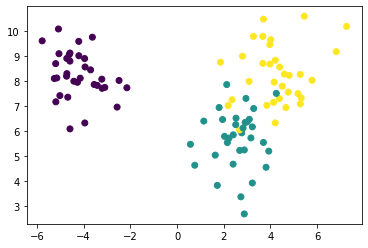

In [4]:
plt.scatter(X[:,0], X[:,1], c=Y)

In [5]:
# Set Parameters
epochs = 20
lr = 0.1
lrSchedulerStep = 10
batchSize = 4
hiddenLayers = [16,16,num_classes]

# Create model
m = MLP(3, hiddenLayers)
criterion = crossentropyLoss

# Create Data Loader
dl = DataLoader(X, Y, batchSize=batchSize, shuffle=True)

In [7]:
# Train
print('Train for {} epochs.'.format(epochs))

for epoch in range(epochs):
    if (epoch+1) % lrSchedulerStep == 0:
        lr *= 0.5

    running_loss = 0

    for batch in dl:
        loss = 0
        for (x, y) in batch:
            y = np.identity(num_classes)[y] #TODO
            pred = m(x)
            loss = loss + criterion(pred, y, m, l1=True)
        loss = loss * (1/len(batch))

        loss.zero_grad()
        loss.backward()
        sgd(lr, loss)
        running_loss += loss
        
    print('Epoch: {}, Loss = {}'.format(epoch, running_loss.val/len(X), lr))

Train for 20 epochs.
[nan, nan, nan]
[nan, nan, nan]
[nan, nan, nan]
[nan, nan, nan]
[nan, nan, nan]
[nan, nan, nan]
[nan, nan, nan]
[nan, nan, nan]
[nan, nan, nan]
[nan, nan, nan]
[nan, nan, nan]
[nan, nan, nan]
[nan, nan, nan]
[nan, nan, nan]
[nan, nan, nan]
[nan, nan, nan]
[nan, nan, nan]
[nan, nan, nan]
[nan, nan, nan]
[nan, nan, nan]
[nan, nan, nan]
[nan, nan, nan]
[nan, nan, nan]
[nan, nan, nan]
[nan, nan, nan]
[nan, nan, nan]
[nan, nan, nan]
[nan, nan, nan]


KeyboardInterrupt: 

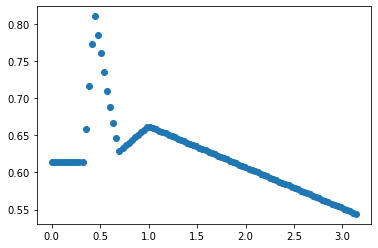

In [9]:
# Test
X_test = [x for x in np.linspace(0, np.pi, 100)]
Y_pred = [m([x])[0].val for x in X_test]

plt.scatter(X_test, Y_pred)